In [1]:
#libraries

import statistics

import salem
import warnings

import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from plotnine import *
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LogNorm, LinearSegmentedColormap
import matplotlib
import cmocean
import seaborn as sns
import folium

import numpy as np
import pandas as pd
import xarray as xr
from scipy import stats
import datetime as dt
from shapely.geometry import Point, Polygon


import glob

In [2]:
# load shapefile with all MPAs
ca_mpas = gpd.GeoDataFrame.from_file("../MPA_dataview_prototype/Data/Shapefiles/mpas/all_mpas/ca_all_mpas.shp")

mpa_lobos_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Point Lobos SMR"]

mpa_buchon_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Point Buchon SMR"]


In [30]:
# Load all plottable datasets

# SST
sst_annual_lobos_comb = xr.open_dataset("Data/Lobos_Processed_Files/sst_lobos_annual_spatialmean.nc")

# Chlorophyll 
chl_annual_lobos_comb = xr.open_dataset("Data/Lobos_Processed_Files/chl_lobos_annual_spatialmean.nc")

# Significant Wave Height
waveheight_stats = pd.read_csv("Data/Lobos_Processed_Files/waveheight_lobos_annual_spatialmean.csv")

# Onshore Stress
onshorestress_stats = pd.read_csv("Data/Lobos_Processed_Files/onshorestress_lobos_annual_spatialmean.csv")

# CUTI
lobos_cuti = xr.open_dataset("Data/Lobos_Processed_Files/lobos_CUTI_daily.nc")

# BEUTI
lobos_beuti = xr.open_dataset("Data/Lobos_Processed_Files/lobos_BEUTI_daily.nc")

# Kelp
lobos_kelp_mean_comb = xr.open_dataset("Data/Lobos_Processed_Files/kelp_lobos_annual_spatialmean.nc")

# PISCO sum
lobos_pisco_fish_sum = pd.read_csv("Data/Lobos_Processed_Files/piscofishsum_lobos_annual.csv")
lobos_pisco_fish_sum['SITE'] = (lobos_pisco_fish_sum['SITE'].astype('category')
                                    .cat.reorder_categories(['MALPASO','MONASTERY',
                                                             'SOBERANES','BLUEFISH',
                                                             'PALO_COLORADO','WESTON',
                                                             'BIXBY'])
                               )

# CCFRP CPUE
lobos_ccfrp_cpue_sum = pd.read_csv("Data/Lobos_Processed_Files/ccfrp_cpue_lobos_annual.csv")

In [31]:
# Code for plots

# Annual mean SST
gg_mean_sst = (ggplot(sst_annual_lobos_comb.to_dataframe().reset_index(), aes(x = 'year', y = 'mean'))+
               geom_line()+
               labs(title = "Annual Mean SST (degC)",
                    x = "Year", y = "Annual Mean SST")+
               theme_bw()
              )

# Annual SST variability
gg_cv_sst = (ggplot(sst_annual_lobos_comb.to_dataframe().reset_index(), aes(x = 'year', y = 'cv'))+
               geom_line()+
               labs(title = "Annual SST Variability",
                    x = "Year", y = "SST Coefficient of Variation")+
               theme_bw()
              )

# Extreme SST values
gg_pct99_sst = (ggplot(sst_annual_lobos_comb.to_dataframe().reset_index(), aes(x = 'year', y = 'number_percentile_99'))+
               geom_line()+
               labs(title = "Number of days in the 99th SST percentile",
                    x = "Year", y = "Mean number of days")+
               theme_bw()
              )

# Annual mean chlorophyll
gg_mean_chl = (ggplot(chl_annual_lobos_comb.to_dataframe().reset_index(), aes(x = 'year', y = 'mean'))+
               geom_line()+
               labs(title = "Annual Mean Chlorophyll",
                    x = "Year", y = "Annual Mean Chl")+
               theme_bw()
              )

# Annual integrated chlorophyll
gg_int_chl = (ggplot(chl_annual_lobos_comb.to_dataframe().reset_index(), aes(x = 'year', y = 'sum'))+
               geom_line()+
               labs(title = "Annual Integrated Chlorophyll",
                    x = "Year", y = "Annual Integrated Chl")+
               theme_bw()
              )

# Annual chlorophyll variability
gg_cv_chl = (ggplot(chl_annual_lobos_comb.to_dataframe().reset_index(), aes(x = 'year', y = 'cv'))+
               geom_line()+
               labs(title = "Annual CV Chlorophyll",
                    x = "Year", y = "Coefficient of Variation Chl")+
               theme_bw()
              )

# Mean significant wave height
gg_waveheight_gmean = (ggplot(waveheight_stats, aes(x = 'Year', y = 'Geom_Mean'))+
                       geom_line()+
                       labs(title = "Annual Geometric Mean of Wave Height",
                            x = "Year",
                            y = "Mean Significant Wave Height (m)")+
                       theme_bw()
                      )

# Maximum significant wave height
gg_waveheight_max = (ggplot(waveheight_stats, aes(x = 'Year', y = 'Max'))+
                       geom_line()+
                       labs(title = "Annual Maximum Wave Height",
                            x = "Year",
                            y = "Maximum Wave Height (m)")+
                       theme_bw()
                      )

# Significant wave height variability
gg_waveheight_cv = (ggplot(waveheight_stats, aes(x = 'Year', y = 'CV'))+
                       geom_line()+
                       labs(title = "Annual Variability in Wave Height",
                            x = "Year",
                            y = "Coefficient of Variability")+
                       theme_bw()
                      )

# Annual mean onshore stress
gg_onshorestress_mean = (ggplot(onshorestress_stats, aes(x = 'Year', y = 'Mean'))+
                         geom_line()+
                         labs(title = "Annual Mean Onshore Stress",
                              x = "Year",
                              y = "Mean Onshore Radiation Stress (m2)")+
                         theme_bw()
                        )

# Onshore stress variability
gg_onshorestress_cv = (ggplot(onshorestress_stats, aes(x = 'Year', y = 'CV'))+
                         geom_line()+
                         labs(title = "Annual Variability Onshore Stress",
                              x = "Year",
                              y = "Coefficient of Variation Onshore Radiation Stress")+
                         theme_bw()
                        )

# CUTI timeseries
gg_lobos_daily_cuti = (ggplot(lobos_cuti.drop_vars('latitude').to_dataframe().reset_index(),
                              aes(x = 'time', y = 'CUTI'))+
                       geom_line()+
                       labs(title = "Upwelling Index",
                            y = "CUTI") +
                       theme_bw()
                      )

# BEUTI timeseries
gg_lobos_daily_beuti = (ggplot(lobos_beuti.drop_vars('latitude').to_dataframe().reset_index(),
                              aes(x = 'time', y = 'BEUTI'))+
                       geom_line()+
                       labs(title = "Upwelling Index",
                            y = "BEUTI") +
                       theme_bw()
                      )

# Annual mean kelp cover
gg_lobos_mean_kelp = (ggplot(lobos_kelp_mean_comb.to_dataframe().reset_index(), aes(x = 'year', y = 'mean'))+
               geom_line()+
               labs(title = "Annual Mean Kelp Cover",
                    x = "Year", y = "Mean Kelp Cover")+
               theme_bw()
              )

# Annual maximum and minimum kelp cover
gg_lobos_range_kelp = (ggplot(lobos_kelp_mean_comb.to_dataframe().reset_index(), aes(x = 'year'))+
               geom_line(aes(y = 'max'))+
               geom_line(aes(y = 'min'))+
               annotate("text", x = 2002, y = 3600, label = "Max")+
               annotate("text", x = 2002, y = 300, label = "Min")+
               labs(title = "Annual Range of Kelp Cover",
                    x = "Year", y = "Kelp Cover")+
               theme_bw()
              )

# PISCO Fish abundances
gg_lobos_pisco_fish = (ggplot(lobos_pisco_fish_sum, 
                              aes(x = 'year', y = 'value', 
                                  color = 'MPA_STATUS', linetype = 'SIDE', group = 'SITE_SIDE'))+
                       geom_line()+
                       scale_linetype_manual(values = ['solid','solid','dashed']) +
                       labs(title = 'PISCO Fish Total Densities',
                            y = 'Density')+
                       facet_wrap('~SITE', ncol = 2)+
                       theme_bw()+
                       theme(legend_title=element_blank())
                      )

# CCFRP CPUEs
gg_lobos_ccfrp_cpue = (ggplot(lobos_ccfrp_cpue_sum, aes(x = 'Year', y = 'CPUE', color = 'Site', group = 'Site')) +
                       geom_line()+
                       labs(title = 'CCFRP Total CPUE')+
                       theme_bw()+
                       theme(legend_title=element_blank())
)


---

# MPA Dataview Prototype: Point Lobos SMR

## Goal: Develop summary metrics that capture the aspects of physical/oceanographic variables that are most ecologically relevant for the ecosystems of interest, and match the scale of ecological monitoring data (mostly annual)

---


### Temporal: univariate spatial mean for the MPA OR pick a representative grid square?
#### How do key oceanographic and ecological variables vary over time in an MPA or reference region? 

- Temperature (West Coast AVHRR, Kahru data): *-- plotted with AVHRR data, but will use Kahru data*
    - SST annual mean &#x2611; 
    - SST CV (variability) &#x2611; 
    - Days in top 1% of all temperatures (measure of extreme values) &#x2611; 
    - is there a threshold value for key species? *-- which species, are thresholds available?* 
    
- Chlorophyll - productivity (West Coast AVHRR, Kahru data) *-- plotted with AVHRR data, but will use Kahru data*
    - Chl annual mean &#x2611; 
    - Annual time-integrated Chl (i.e., how productive a year was?) &#x2611; 
    - Chl CV (variability) *-- annual variability probably not as informative? subset to a specific season?*
    - Timing of peak value? *-- is this relevant? i.e. an early/late start to upwelling*
    - Measure of extreme values
    
- Wave heights (CDIP MOP)
    - Geometric mean &#x2611; 
    - Maximum &#x2611; 
    - Variability (CV) &#x2611; 
    - Extreme events
    - what else is relevant?
    
- Onshore stress (CDIP MOP)
    - Geometric mean &#x2611; 
    - Maximum &#x2611; 
    - Variability (CV) &#x2611; 
    
- Upwelling index (BEUTI/CUTI) *-- currently manually downloaded*
    - Daily timeseries &#x2611
    - Averaged throughout the month/year? the expected upwelling season?
    - What metrics make sense?
    
- Wind

- Exposure Index?

- Kelp cover
    - Annual mean &#x2611; 
    - Annual max/min &#x2611; 
    - Mean for the spring/summer?
    - Timing of peak value?

- Abundance and diversity of organisms *-- PISCO, MARINe, CCFRP data*
    - Counts, density, or biomass &#x2611; 
    - Measure of diversity (functional diversity?)
    - what to do with PISCO UPC data, if anything?

### Spatial view: on time-invariant variables, or on across-time metrics 
#### How do physical/oceanographic conditions vary across the spatial extent of an MPA? Between an MPA and nearby areas, reference sites, or the whole bioregion?

- Bathymetry (NCEI Coastal Relief model)
    - Are there metric(s) that we can develop to summarize key aspects of bathymetry at a site?

- Temperature (West Coast AVHRR, Kahru data)
    - What is the range of SST extremes and variability across an MPA, or between an MPA and surrounding area? (microclimates/safe spaces concept for climate change)
    - SST CV/range across time
 
 
 ---
 
 

## Sea Surface Temperature

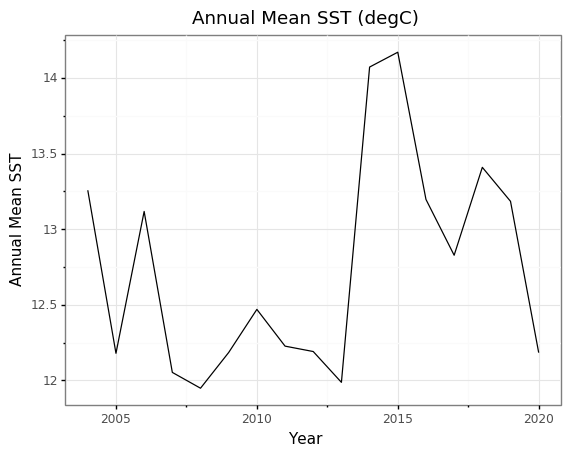

<ggplot: (8768764504553)>

In [13]:
gg_mean_sst

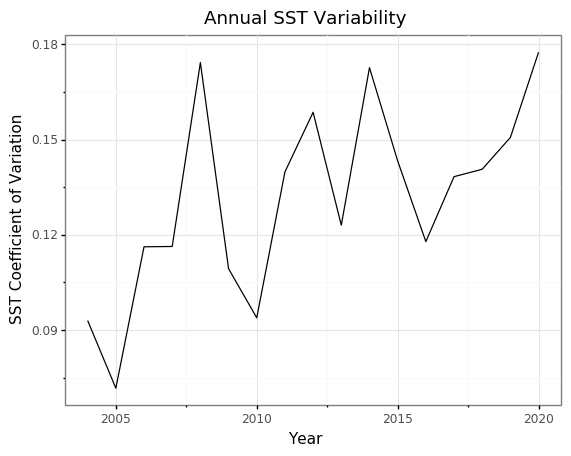

<ggplot: (8768764500729)>

In [11]:
gg_cv_sst

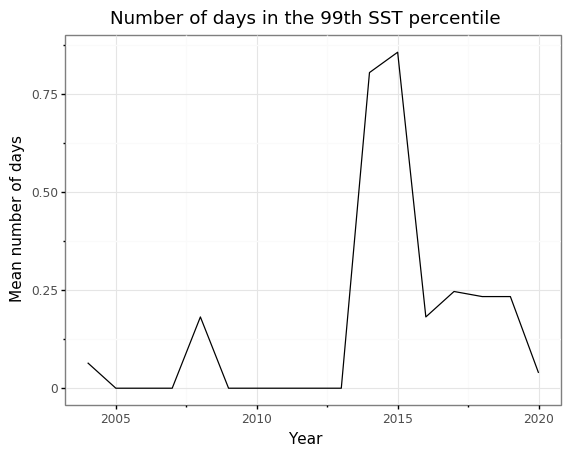

<ggplot: (8768764892761)>

In [12]:
gg_pct99_sst

---

## Chlorophyll

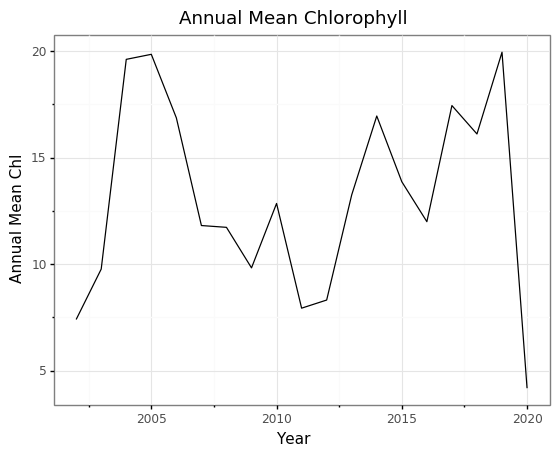

<ggplot: (8768764893221)>

In [14]:
gg_mean_chl

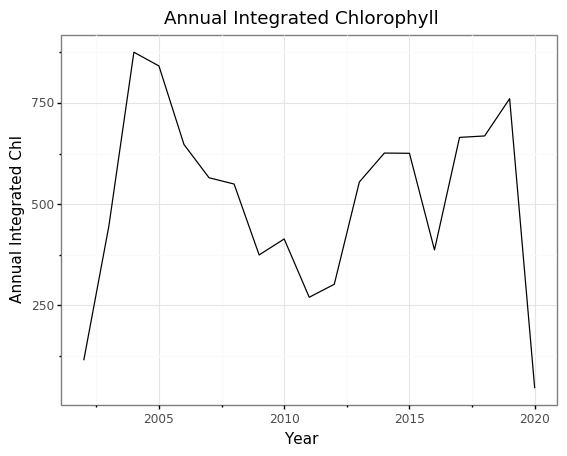

<ggplot: (8768764500569)>

In [15]:
gg_int_chl

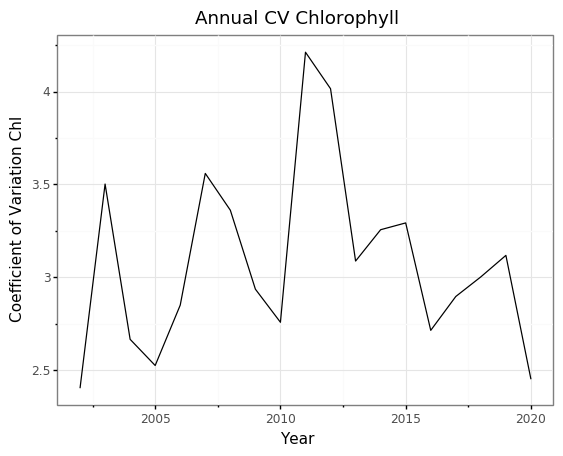

<ggplot: (8768764498685)>

In [16]:
gg_cv_chl

---

## Significant wave height

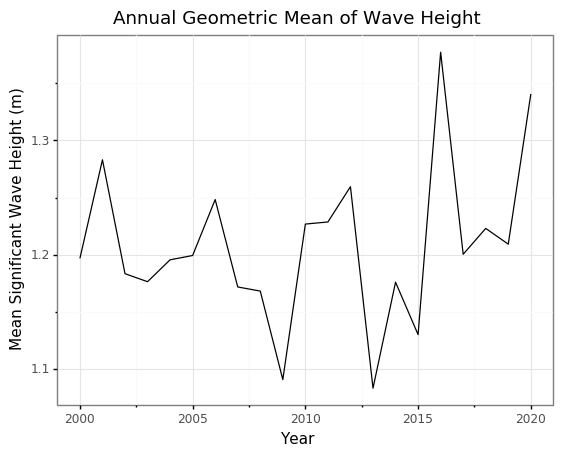

<ggplot: (8768764886573)>

In [17]:
gg_waveheight_gmean

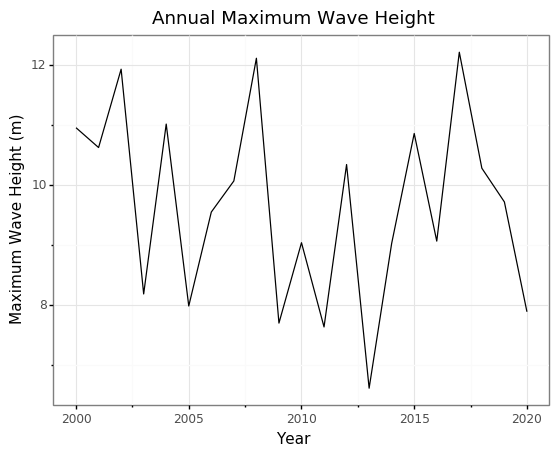

<ggplot: (8768764889157)>

In [18]:
gg_waveheight_max

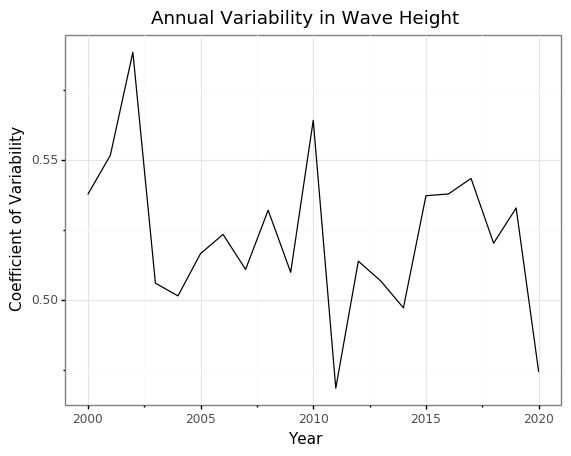

<ggplot: (8768764887473)>

In [19]:
gg_waveheight_cv

---

## Onshore radiation stress

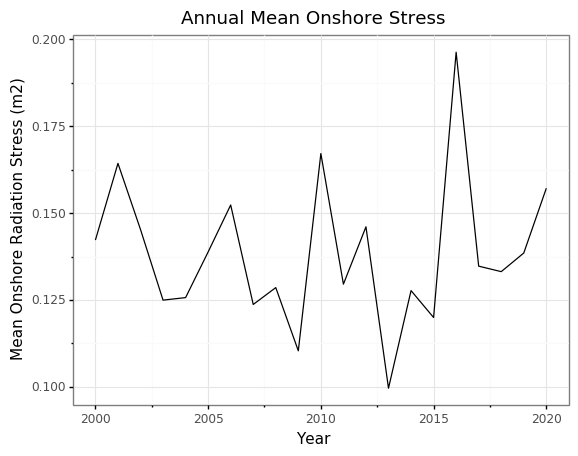

<ggplot: (8768764899645)>

In [20]:
gg_onshorestress_mean

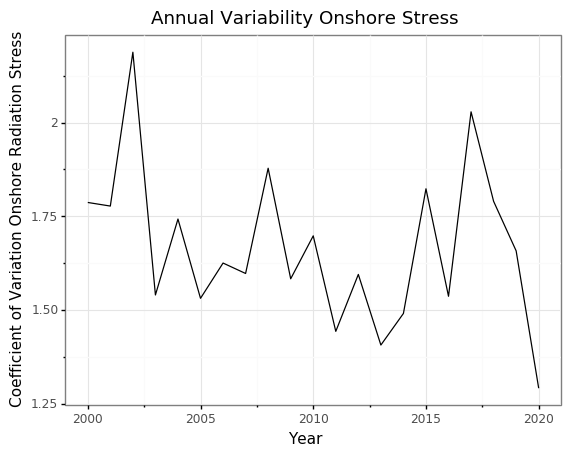

<ggplot: (8768764492345)>

In [21]:
gg_onshorestress_cv

---

##  Upwelling indices

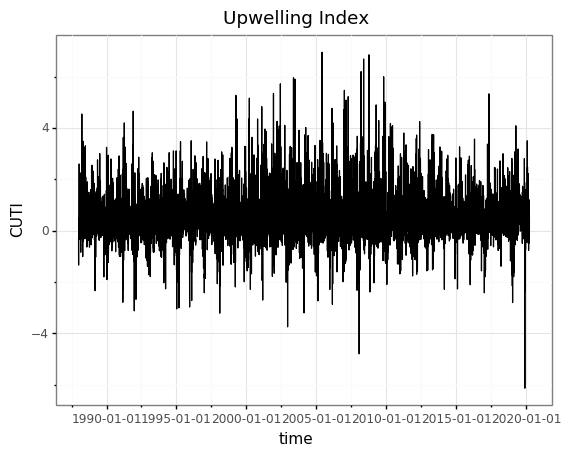

<ggplot: (8768764492285)>

In [24]:
gg_lobos_daily_cuti

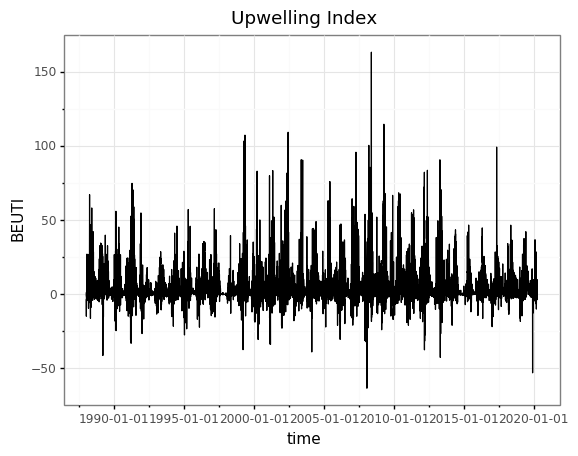

<ggplot: (8768764505113)>

In [25]:
gg_lobos_daily_beuti

---

## Kelp cover

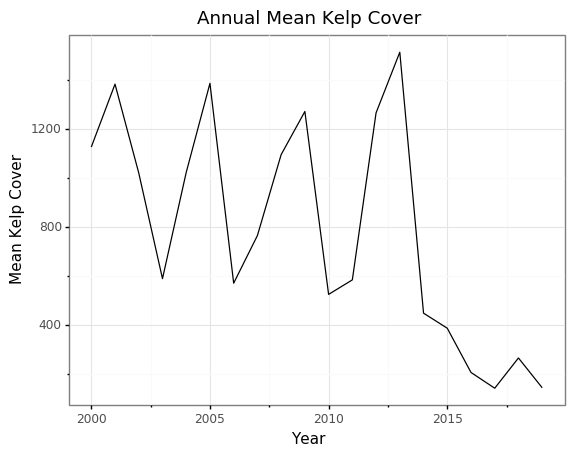

<ggplot: (8768764493757)>

In [26]:
gg_lobos_mean_kelp 

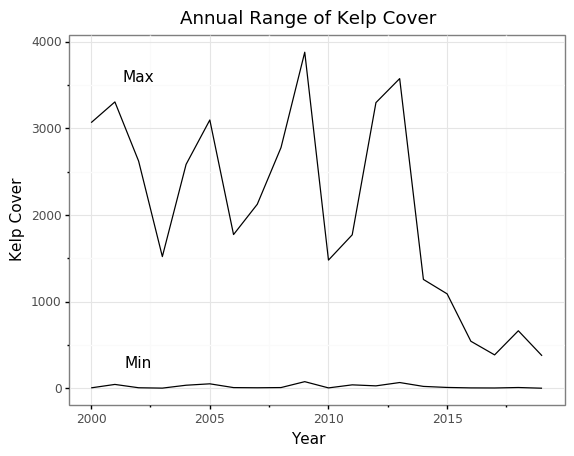

<ggplot: (8768764758501)>

In [27]:
gg_lobos_range_kelp

---

## Monitoring Data

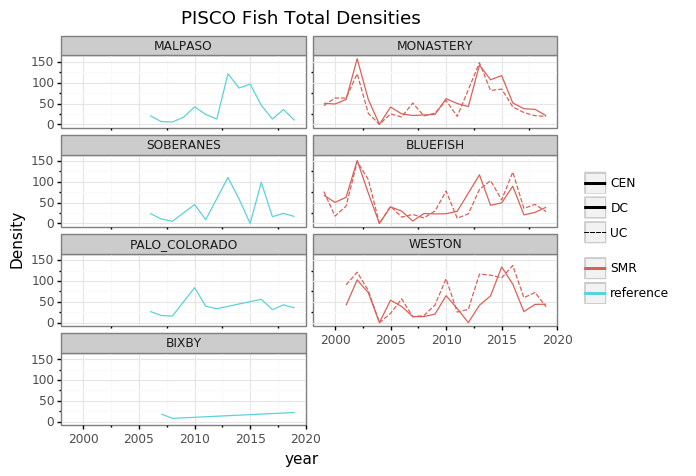

<ggplot: (8768832315009)>

In [32]:
gg_lobos_pisco_fish

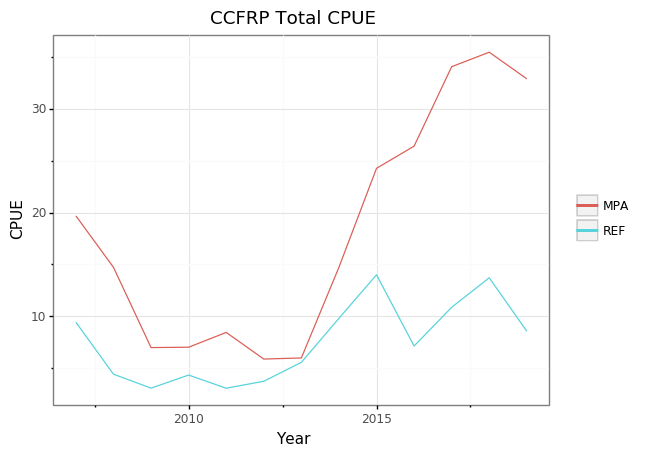

<ggplot: (8768764754693)>

In [29]:
gg_lobos_ccfrp_cpue